# Homework Set 2

Inialization

In [3]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In the first part, we read the data and then standardlize the stored data, which is exactly the same as what we did in homework set 1.

In [4]:
df_train = pd.read_csv('../Dataset/Kaggle-Give-Me-Some-Data/cs-training.csv', index_col=0)
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
X_train_fill = df_train.fillna(df_train.mean())
X_train = X_train_fill.iloc[:,1:]
y_train = X_train_fill['SeriousDlqin2yrs']
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

array([0.29948872, 0.1533157 , 0.12254696, 0.10092078, 0.10010863,
       0.09344974, 0.073465  , 0.05430268, 0.00172094, 0.00068085])

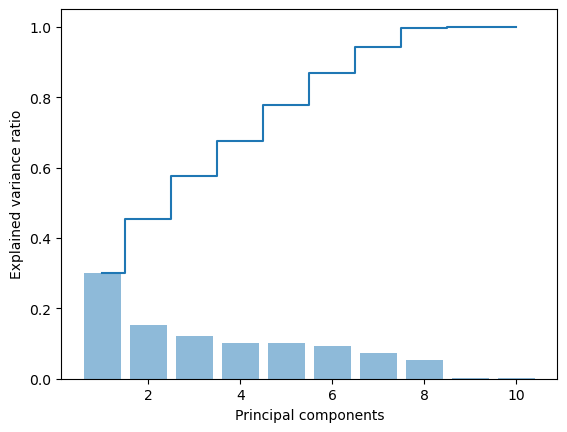

In [6]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
display(pca.explained_variance_ratio_)
plt.bar(range(1, 11), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 11), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

We can find from the above figure that the first component explains about 0.3 variance, and the following 7 components account for almost all the remaining variance. Therefore, in this case we use the first eight features.

In [7]:
pipe_svc = make_pipeline(StandardScaler(), PCA(n_components=8), SVC(random_state=1))
param_C_range = [0.1, 1.0, 10.0]
param_gama_range = [0.01, 0.1, 1.0]
param_grid = [{'svc__C': param_C_range, 
               'svc__gamma': param_gama_range, 
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=5,
                  n_jobs=-1)
gs = gs.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
print('Test accuracy: %.4f' % clf.score(X_train_std, y_train))

(When I tried to run the code one last time before submitting the job, my computer stopped running because it was hibernating, so much so that I had to write down the results manually to avoid going over the deadline.)

0.9651

{'svc__C': 1.0, 'svc__gamma': 1.0, 'svc__kernel': 'rbf'}

Test accuracy: 0.9654